In [ ]:
!pip install pandas matplotlib seaborn scikit-learn openpyxl

# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [ ]:
def load_data():
  data = pd.read_excel('/content/dataclean.xlsx')
  return data

# Dataset dimuat dari file Excel dataclean.xlsx.
# Dataset sudah mengalami proses cleaning dan preprocessing

In [ ]:
tweet_df = load_data()

In [ ]:
tweet_df.head()

,Unnamed: 0,Kategori,Sentimen,lower,h_angka,tokenizing,filtering,tweet_clean
0,0,netral,"Komisi Pemilihan Umum, Sabtu (19/8/2023), memp...","komisi pemilihan umum, sabtu (19/8/2023), memp...",komisi pemilihan umum sabtu memperbarui daftar...,"['komisi', 'pemilihan', 'umum', 'sabtu', 'memp...",komisi pemilihan um sabtu memperbarui daftar c...,komisi pilih um sabtu baru daftar calon sement...
1,1,netral,"Targetkan Enam Kursi di Pemilu 2024, Ketua DPC...","targetkan enam kursi di pemilu 2024, ketua dpc...",targetkan enam kursi di pemilu ketua dpc pdip ...,"['targetkan', 'enam', 'kursi', 'di', 'pemilu',...",targetkan enam kursi di pemilu ketua dpc pdip ...,target enam kursi di milu ketua dpc pdip sarol...
2,2,positif,Presiden 2024 hanya Ganjar PranowoTerbaik !! y...,presiden 2024 hanya ganjar pranowoterbaik !! y...,presiden hanya ganjar pranowoterbaik yang lain...,"['presiden', 'hanya', 'ganjar', 'pranowoterbai...",presiden hanya ganjar pranowoterbaik yang lain...,presiden hanya ganjar pranowoterbaik yang lai ...
3,3,netral,"kontestasi berharap cawapres"" versus ""kandidat...","kontestasi berharap cawapres"" versus ""kandidat...",kontestasi berharap cawapres versus kandidat c...,"['kontestasi', 'berharap', 'cawapres', 'versus...",kontestasi berharap cawapres versus kandidat c...,kontestasi harap cawapres versus kandidat cawa...
4,4,netral,"*Minggu Kasih Kapolres Tabanan, Ajak Jemaat Su...","*minggu kasih kapolres tabanan, ajak jemaat su...",minggu kasih kapolres tabanan ajak jemaat suk...,"['minggu', 'kasih', 'kapolres', 'tabanan', 'aj...",mingu kasih kapolres taban ajak jemat sukseska...,mingu kasih kapolres taban ajak jemat sukses m...


In [ ]:
# Mengambil kolom teks
texts = tweet_df['tweet_clean'].astype(str).tolist()

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(texts)
# Mengubah data teks tweet_clean menjadi vektor angka menggunakan TF-IDF
# max_features=1000 membatasi jumlah kata unik menjadi 1000 yang paling sering muncul.

# K-Means Clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(X_tfidf)
# Melakukan clustering dengan K-Means untuk mengelompokkan tweet ke dalam 5 klaster.
# labels berisi label klaster untuk masing-masing tweet.

# Silhouette Score
sil_score = silhouette_score(X_tfidf, labels)
print(f'Silhouette Score: {sil_score:.2f}')
# Menghitung Silhouette Score

Silhouette Score: 0.03


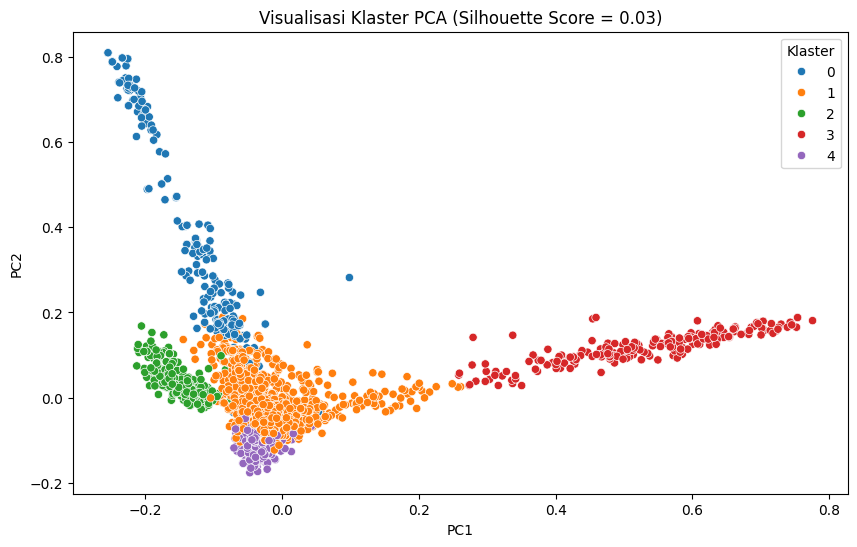

In [ ]:
# Reduksi dimensi untuk visualisasi
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())
# Menggunakan PCA untuk mereduksi dimensi data vektor TF-IDF menjadi 2D agar bisa divisualisasikan

# DataFrame visualisasi
viz_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Cluster': labels
})

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=viz_df, x='PC1', y='PC2', hue='Cluster', palette='tab10')
# Memvisualisasikan hasil klasterisasi dalam ruang 2D
# Masing-masing warna mewakili satu klaster (0–4)

plt.title(f'Visualisasi Klaster PCA (Silhouette Score = {sil_score:.2f})')
plt.legend(title='Klaster')
plt.show()


In [ ]:
# Menambahkan kolom label ke DataFrame
tweet_df['Cluster'] = labels

# Menampilkan teks lengkap dari masing-masing klaster
for i in range(num_clusters):
    print(f"\nContoh dari Klaster {i}:")
    # Mengganti df dengan tweet_df untuk mengakses kolom 'Cluster'
    contoh_teks = tweet_df[tweet_df['Cluster'] == i]['tweet_clean'].head(3)
    for teks in contoh_teks:
        print("-", teks)


Contoh dari Klaster 0:
- presiden hanya ganjar pranowoterbaik yang lai masalah semua ganjarhebat ganjarpresidenku milu indonesiamaju persatuanrakyatdanumat
- ganjar pranowo sangat rakyat dan sangat pantas jadi presiden ganjarhebat ganjarpresidenku milu indonesiamaju
- masyarakat sangat tungu ganjar pranowo jadi presiden ganjarhebat ganjarpresidenku milu indonesiamaju

Contoh dari Klaster 1:
- komisi pilih um sabtu baru daftar calon sementara milu legislatif sebab temu salah gegara kelai manusia tajukrencana adikompas
- target enam kursi di milu ketua dpc pdip sarolangun sebut semua sudah gerak
- kontestasi harap cawapres versus kandidat cawapres bagaimana resepsi gen z

Contoh dari Klaster 2:
- prabowo subianto busuk memanfatkan bagai cara agar bisa nyapres lagi prabowo pilpres milu
- figur menteri tahan prabowo subianto adalah sok yang mampu satu bagai kalang demi penting tahan negara moga beliau terus sukses pilpres dekade mendingprabowo terusmajubersamaprabowo milu
- mampu figur me

**Penjelasan Tiap Klaster Berdasarkan Contoh Tweet**

**Klaster 0** = Dukungan ke Ganjar Pranowo

Berisi tweet positif dan dukungan terhadap Ganjar Pranowo sebagai calon presiden.

Kata kunci: ganjarhebat, ganjarpresidenku, indonesiamaju, persatuanrakyatdanumat.
Topik: Kampanye positif dan pujian terhadap Ganjar.

**Klaster 1** = Informasi Netral tentang Pemilu & Politik

Berisi tweet informatif dan netral tentang jadwal pemilu, DCS, partai politik, dan cawapres.

Kata kunci: komisi, pilih, dpc pdip, kontestasi, cawapres.
Topik: Informasi teknis & netral seputar politik dan pemilu.

**Klaster 2** = Dukungan & Kritik terhadap Prabowo Subianto

Berisi gabungan antara kritik dan dukungan terhadap Prabowo sebagai figur menteri pertahanan dan capres.

Kata kunci: mendingprabowo, terusmajubersamaprabowo, pilpres.
Topik: Opini publik (positif dan negatif) tentang Prabowo.

**Klaster 3** = Kampanye Gus Muhaimin & PKB

Berisi tweet dukungan terhadap Gus Muhaimin (Cak Imin) sebagai capres dan PKB.

Kata kunci: gusmuhaimin, cakiminow, pkb, hijaukanindonesia.
Topik: Kampanye positif terhadap Gus Muhaimin & PKB.

**Klaster 4** = Kegiatan Sosialisasi Pemilu di Masyarakat

Berisi tweet tentang kegiatan lapangan dan sosialisasi pemilu yang dilakukan di desa-desa.

Kata kunci: sosialisasi, pawai budaya, temanpemilih, desa ngariboyo.
Topik: Sosialisasi dan aktivitas pemilu berbasis komunitas.

